In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import sys
sys.path.append('../src/')

import torch
import matplotlib.pyplot as plt
from model import FNO2d
from plot_tools import plot_data

import numpy as np

## Homogeneous models

In [42]:
# the model parameter should be the same as the training
mode1           = 12
mode2           = 12
width           = 15
model = FNO2d(mode1, mode2, width)

data_path  = '/scr2/haipeng/openfwi_dataset_train/'
model_path = '/scr2/haipeng/openfwi_dataset_train/'

# Load model
model.load_state_dict(torch.load(model_path + 'model_vz_homo_ns500_nt801_nx128_nz32'))

# Load test dataset
vp_test  = torch.load(data_path + 'vp_homo_ns500_nx128_nz32_test.pt')
vs_test  = torch.load(data_path + 'vs_homo_ns500_nx128_nz32_test.pt')
rho_test = torch.load(data_path + 'rho_homo_ns500_nx128_nz32_test.pt')
vz_test  = torch.load(data_path + 'vz_homo_ns500_nt801_nx128_nz32_test.pt')

print(vp_test.shape)
print(vs_test.shape)
print(rho_test.shape)
print(vz_test.shape)

torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 801])


## Prediction

In [43]:
T_in = 50
vz_pred = model(vz_test[:,:,:,:T_in], vp_test, vs_test, rho_test)
vz_pred = torch.cat((vz_test[:,:,:,:T_in], vz_pred), dim=-1)
print(vz_pred.shape)

torch.Size([50, 128, 32, 350])


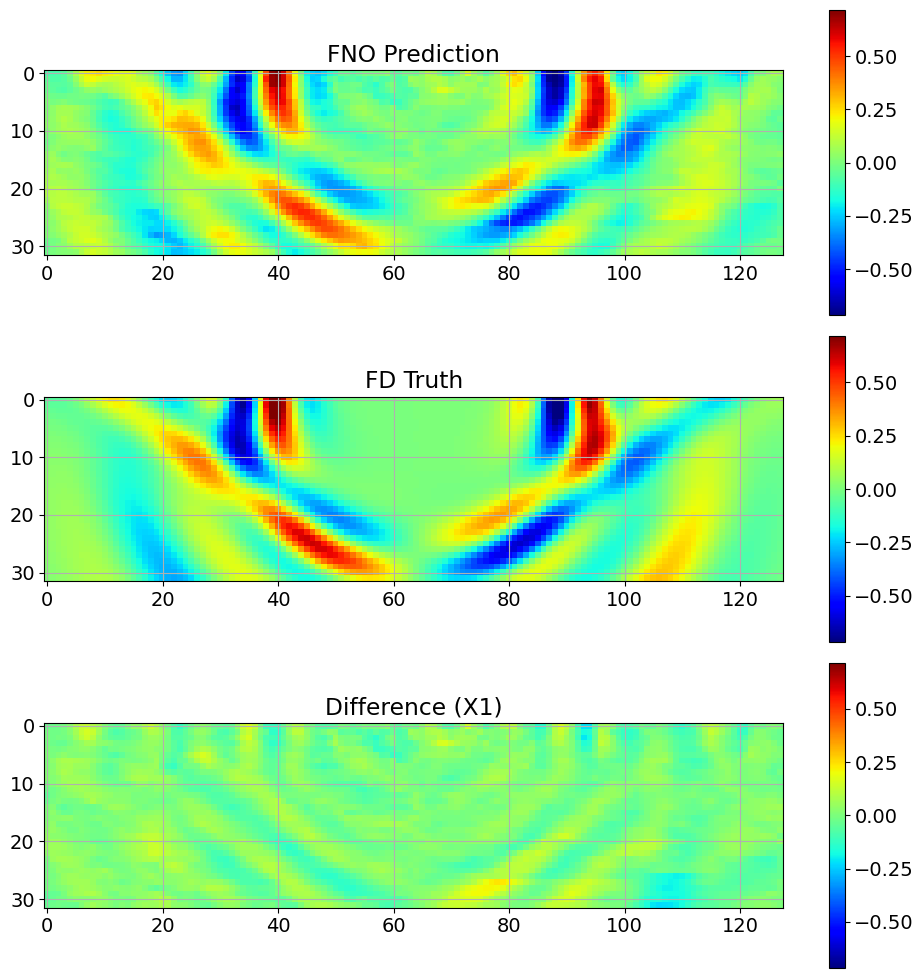

In [44]:
ns = 20
it = 200

plot_data(vz_pred[ns,:,:,it], vz_test[ns,:,:,it], title1='FNO Prediction', title2='FD Truth',ratio=1, aspect=1, cmap='jet', clip=99.999999,)

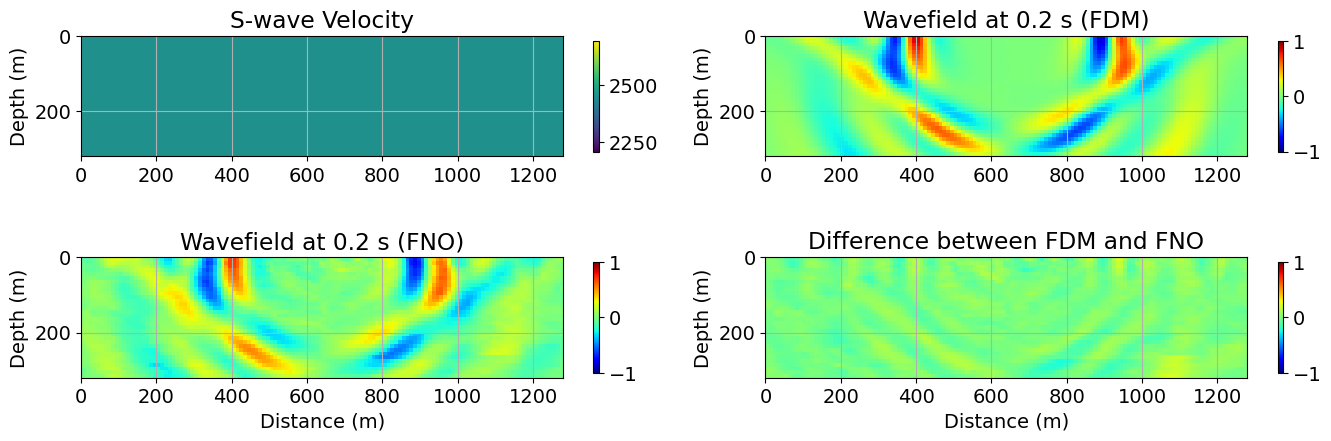

In [50]:
plt.figure(figsize=(14, 5))


plt.rcParams['font.size'] = 14

plt.subplot(221)
plt.imshow(vs_test[ns].squeeze().T, extent=[0, 128*10, 32*10, 0])
plt.ylabel('Depth (m)')
plt.grid()
plt.title('S-wave Velocity')
plt.colorbar(shrink=0.5)

plt.subplot(222)
plt.imshow(vz_test[ns,:,:,it].cpu().detach().numpy().T, vmin=-1, vmax=1,cmap='jet', extent=[0, 128*10, 32*10, 0])
plt.ylabel('Depth (m)')
plt.grid()
plt.title('Wavefield at 0.2 s (FDM)')
plt.colorbar(shrink=0.5)

plt.subplot(223)
plt.imshow(vz_pred[ns,:,:,it].cpu().detach().numpy().T, vmin=-1, vmax=1,cmap='jet', extent=[0, 128*10, 32*10, 0])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Wavefield at 0.2 s (FNO)')
plt.grid()
plt.colorbar(shrink=0.5)

plt.subplot(224)
plt.imshow(vz_test[ns,:,:,it].cpu().detach().numpy().T-vz_pred[ns,:,:,it].cpu().detach().numpy().T, vmin=-1, vmax=1,cmap='jet', extent=[0, 128*10, 32*10, 0])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Difference between FDM and FNO')
plt.grid()
plt.colorbar(shrink=0.5)

plt.tight_layout()

plt.savefig('homo_result.png', dpi=300)

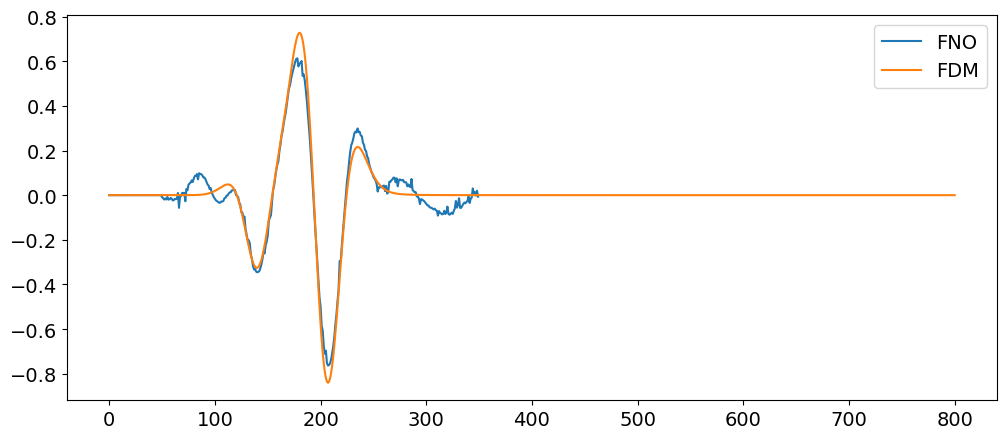

In [46]:
fig = plt.figure(figsize = (12,5)) # create the canvas for plotting

ix = 90
plt.plot(vz_pred[ns, ix, 1, :].cpu().detach().numpy(), label='FNO')
plt.plot(vz_test[ns, ix, 1, :].cpu().detach().numpy(), label='FDM')
plt.legend()


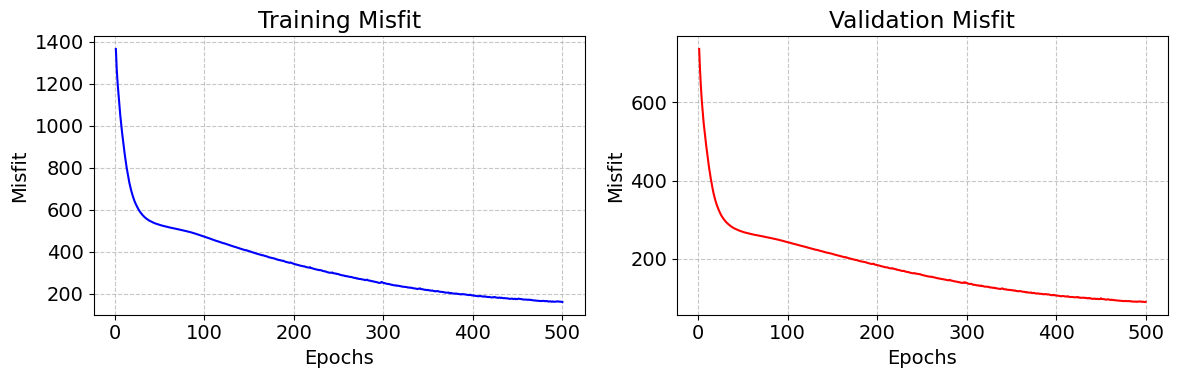

In [49]:
train_misfit = torch.load(model_path + 'model_vz_homo_ns500_nt801_nx128_nz32_train_loss.pt').numpy()
valid_misfit = torch.load(model_path + 'model_vz_homo_ns500_nt801_nx128_nz32_valid_loss.pt').numpy()

epochs = np.arange(1, train_misfit.shape[0]+1)  # 1 to 10 epochs

plt.figure(figsize=(12, 4))

# Plotting the training misfit
plt.subplot(1, 2, 1)
plt.plot(epochs, train_misfit, linestyle='-', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Misfit')
plt.title('Training Misfit')
plt.grid(True, linestyle='--', alpha=0.7)

# Plotting the validation misfit
plt.subplot(1, 2, 2)
plt.plot(epochs, valid_misfit,  linestyle='-', color='red')
plt.xlabel('Epochs')
plt.ylabel('Misfit')
plt.title('Validation Misfit')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjusting layout
plt.tight_layout()

# Show the plot

plt.savefig('misfit_result.png', dpi=300)
plt.show()

# fig = plt.figure(figsize = (16,5))
# plt.subplot(1, 2, 1)

# plt.semilogy(train_misfit)
# plt.title('Train dataset')
# plt.subplot(1, 2, 2)
# plt.semilogy(valid_misfit)
# plt.title('Valid dataset')

In [16]:
# Use plot_wavefield in Jupyter notebook
from IPython.display import HTML
from plot_tools import plot_wavefield, plot_model

test_plot = vz_pred[0].permute(2,0,1).cpu().detach().numpy()
wavefield_ani = plot_wavefield(test_plot[::10,:,:])
HTML(wavefield_ani.to_jshtml())

## Layered models

In [14]:
# the model parameter should be the same as the training
mode1           = 12
mode2           = 12
width           = 15
model = FNO2d(mode1, mode2, width)

data_path  = '/scr2/haipeng/openfwi_dataset_train/'
model_path = '/scr2/haipeng/openfwi_dataset_train/'

# Load model
model.load_state_dict(torch.load(model_path + 'model_vz_layered_ns500_nt801_nx128_nz32'))

# Load test dataset
vp_test  = torch.load(data_path + 'vp_layered_ns500_nx128_nz32_test.pt')
vs_test  = torch.load(data_path + 'vs_layered_ns500_nx128_nz32_test.pt')
rho_test = torch.load(data_path + 'rho_layered_ns500_nx128_nz32_test.pt')
vz_test  = torch.load(data_path + 'vz_layered_ns500_nt801_nx128_nz32_test.pt')

print(vp_test.shape)
print(vs_test.shape)
print(rho_test.shape)
print(vz_test.shape)

torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 801])


In [15]:
## Prediction

In [16]:
T_in = 50
vz_pred = model(vz_test[:,:,:,:T_in], vp_test, vs_test, rho_test)
vz_pred = torch.cat((vz_test[:,:,:,:T_in], vz_pred), dim=-1)
print(vz_pred.shape)

torch.Size([50, 128, 32, 350])


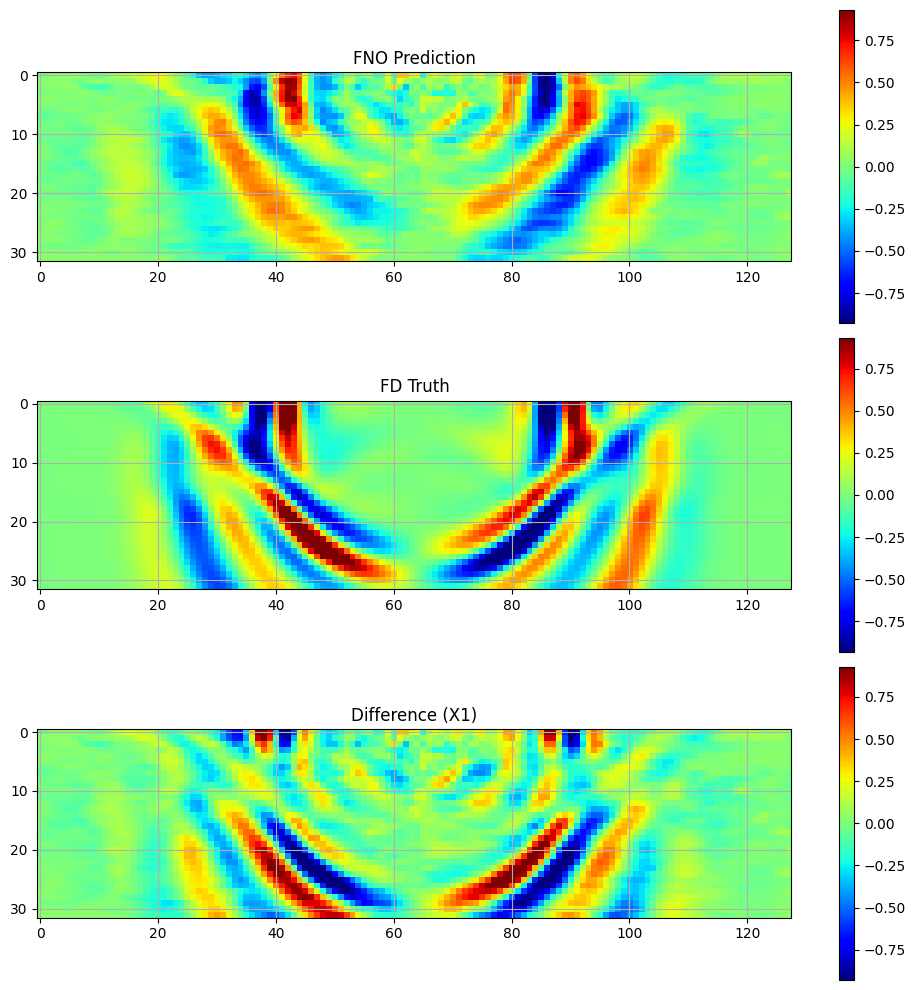

In [21]:
ns = 0
it = 250
plot_data(vz_pred[ns,:,:,it], vz_test[ns,:,:,it], title1='FNO Prediction', title2='FD Truth',ratio=1, aspect=1, cmap='jet', clip=99.999999,)

Text(0.5, 1.0, 'Valid dataset')

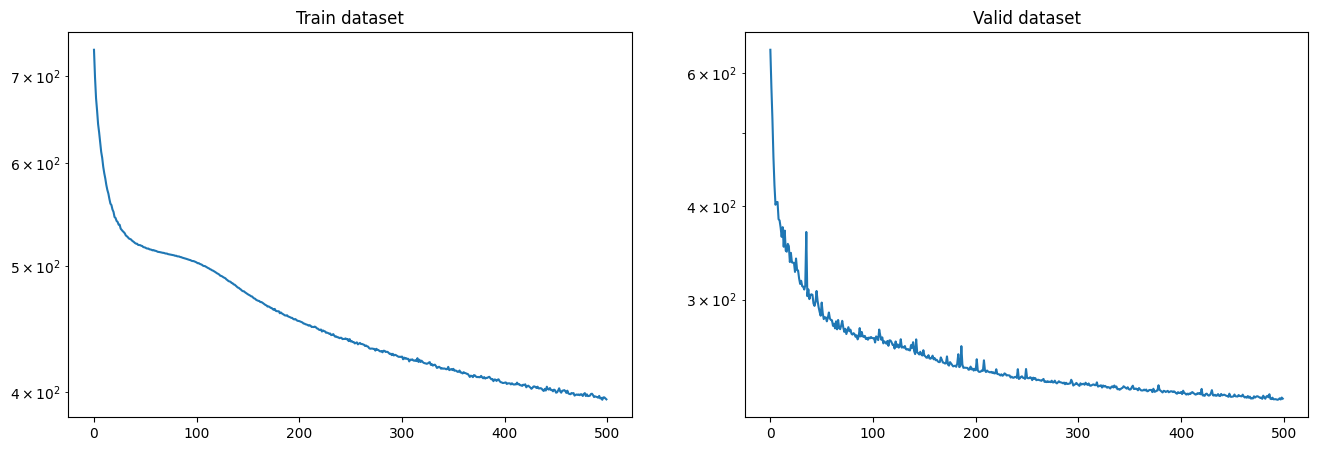

In [20]:
train_misfit = torch.load(model_path + 'model_vz_layered_ns500_nt801_nx128_nz32_train_loss.pt').numpy()
valid_misfit = torch.load(model_path + 'model_vz_layered_ns500_nt801_nx128_nz32_valid_loss.pt').numpy()

fig = plt.figure(figsize = (16,5))
plt.subplot(1, 2, 1)

plt.semilogy(train_misfit)
plt.title('Train dataset')
plt.subplot(1, 2, 2)
plt.semilogy(valid_misfit)
plt.title('Valid dataset')

In [9]:
# Use plot_wavefield in Jupyter notebook
from IPython.display import HTML
from plot_tools import plot_wavefield, plot_model

test_plot = vz_pred[0].permute(2,0,1).cpu().detach().numpy()
wavefield_ani = plot_wavefield(test_plot[::10,:,:])
HTML(wavefield_ani.to_jshtml())

## Curved models

In [28]:
# the model parameter should be the same as the training
mode1           = 12
mode2           = 12
width           = 15
model = FNO2d(mode1, mode2, width)

data_path = '/scr2/haipeng/openfwi_dataset_train/'
model_path = '/scr2/haipeng/openfwi_dataset_train/'

# Load model
model.load_state_dict(torch.load(model_path + 'model_vz_curved_ns500_nt801_nx128_nz32'))

# Load test dataset
vp_test  = torch.load(data_path + 'vp_curved_ns500_nx128_nz32_test.pt')
vs_test  = torch.load(data_path + 'vs_curved_ns500_nx128_nz32_test.pt')
rho_test = torch.load(data_path + 'rho_curved_ns500_nx128_nz32_test.pt')
vz_test  = torch.load(data_path + 'vz_curved_ns500_nt801_nx128_nz32_test.pt')

print(vp_test.shape)
print(vs_test.shape)
print(rho_test.shape)
print(vz_test.shape)

torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 1])
torch.Size([50, 128, 32, 801])


## Prediction

In [29]:
T_in = 50
vz_pred = model(vz_test[:,:,:,:T_in], vp_test, vs_test, rho_test)
vz_pred = torch.cat((vz_test[:,:,:,:T_in], vz_pred), dim=-1)
print(vz_pred.shape)

torch.Size([50, 128, 32, 350])


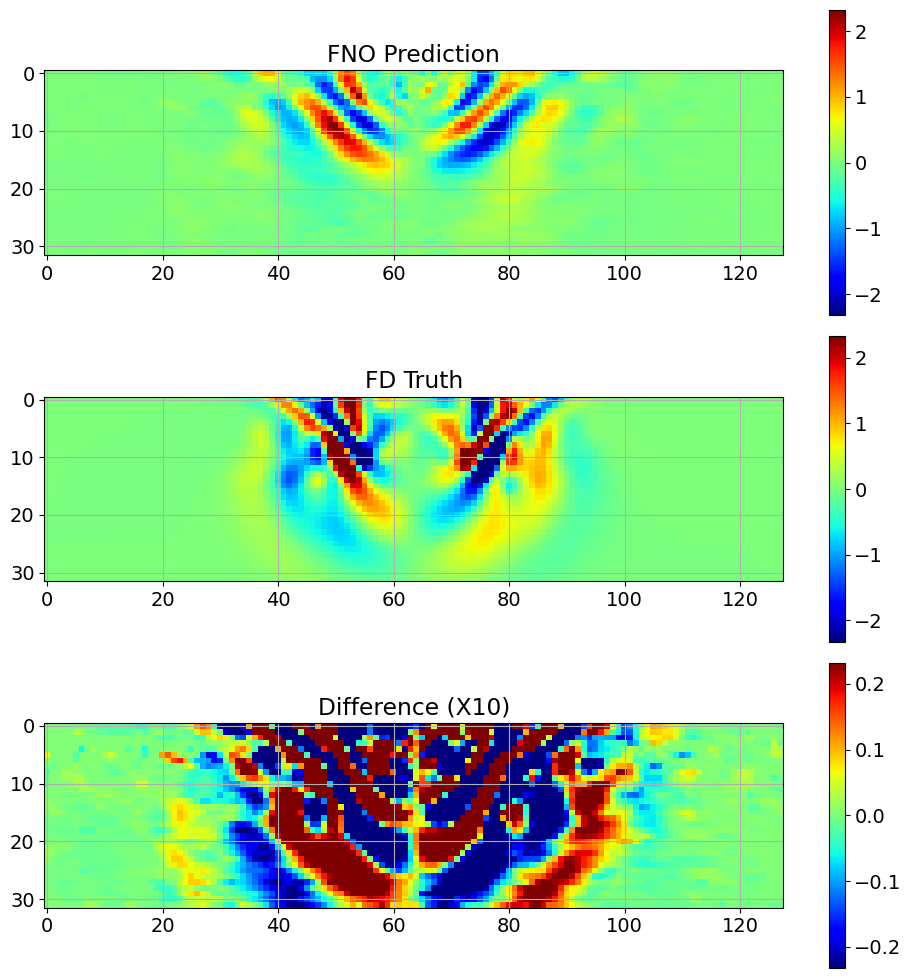

In [34]:
ns = 10
it = 220

plot_data(vz_pred[ns,:,:,it], vz_test[ns,:,:,it], title1='FNO Prediction', title2='FD Truth',ratio=10, aspect=1, cmap='jet', clip=99.999999,)

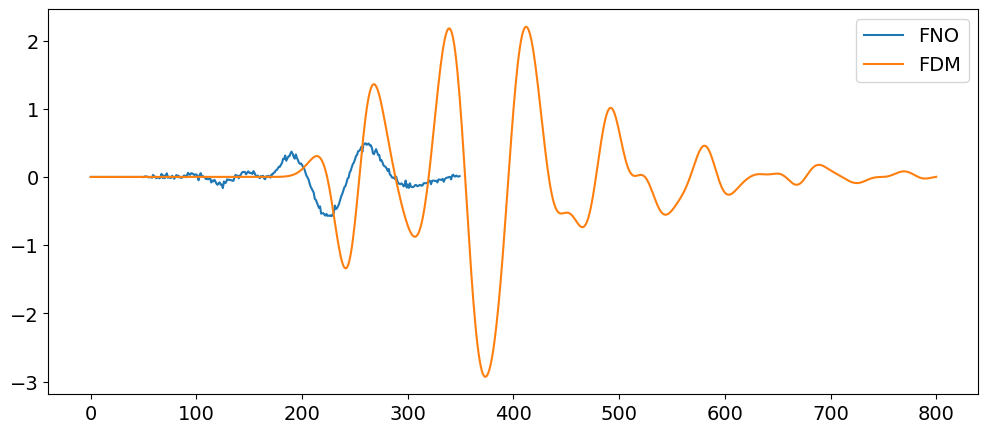

In [37]:
fig = plt.figure(figsize = (12,5)) # create the canvas for plotting

ix = 90
plt.plot(vz_pred[ns, ix, 1, :].cpu().detach().numpy(), label='FNO')
plt.plot(vz_test[ns, ix, 1, :].cpu().detach().numpy(), label='FDM')
plt.legend()


Text(0.5, 1.0, 'Valid dataset')

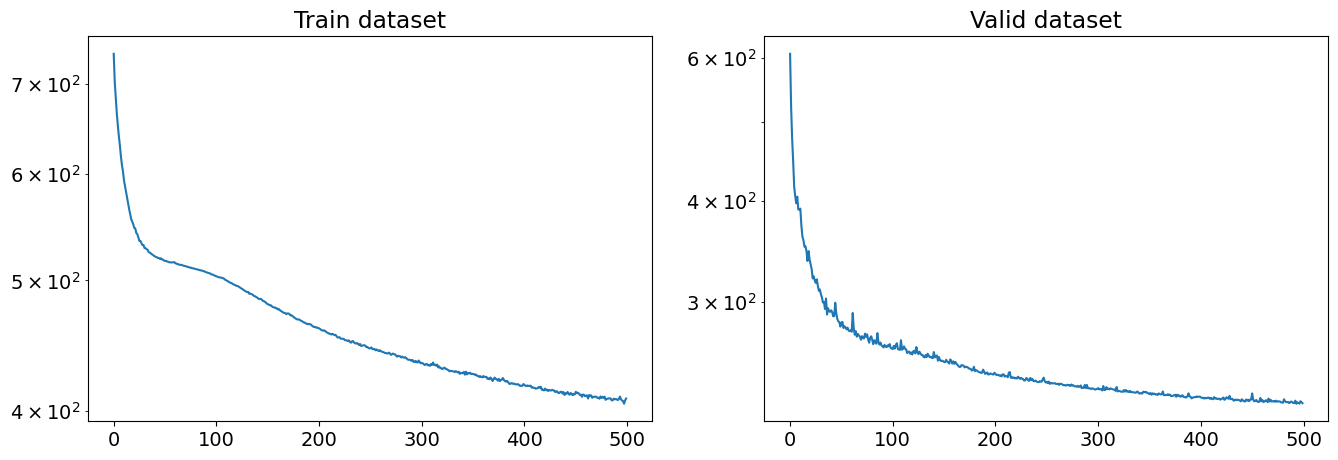

In [39]:
train_misfit = torch.load(model_path + 'model_vz_curved_ns500_nt801_nx128_nz32_train_loss.pt').numpy()
valid_misfit = torch.load(model_path + 'model_vz_curved_ns500_nt801_nx128_nz32_valid_loss.pt').numpy()

fig = plt.figure(figsize = (16,5))
plt.subplot(1, 2, 1)
plt.semilogy(train_misfit)
plt.title('Train dataset')
plt.subplot(1, 2, 2)
plt.semilogy(valid_misfit)
plt.title('Valid dataset')

In [17]:
# Use plot_wavefield in Jupyter notebook
from IPython.display import HTML
from plot_tools import plot_wavefield, plot_model


test_plot = vz_pred[0].permute(2,0,1).cpu().detach().numpy()
wavefield_ani = plot_wavefield(test_plot[::10,:,:])
HTML(wavefield_ani.to_jshtml())